In [ ]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

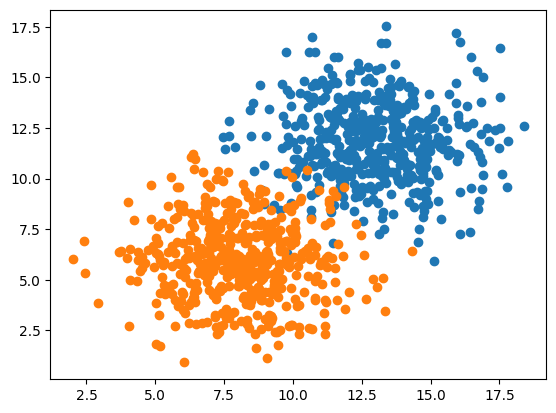

In [ ]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [ ]:
model = Sequential()
model.add(Dense(units = 1, input_shape=(2,), activation='sigmoid'))

'''
Train Loss: Value of the objective function you are minimizing. This value could be a positive or negative number, depending on the specific objective function.
Train Error: Human interpretable metric of your model's performance. Usually means what % of training examples the model got incorrect. This is always a value between 0 and 1.
'''
adam = Adam(lr = 0.1) # Optimizer
# Metrics function is used after each epoch to judge accuract but NOT to train it (unlike Error func above)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])

# Shuffle data to avoid getting stuck in local minima
h= model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')



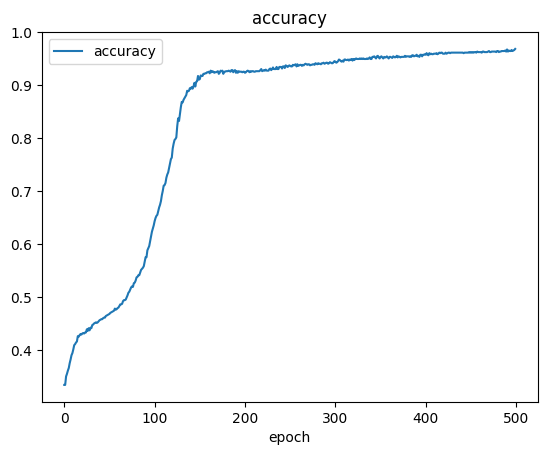

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

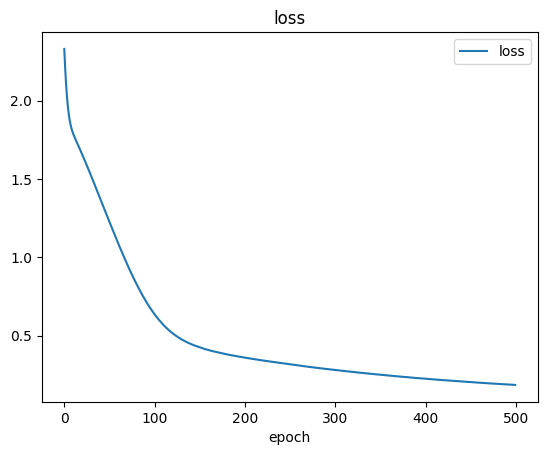

In [ ]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [1]:
def plot_decision_boundary(X, y, model): # X is above input data, y is labels(0,1), model is trained fitted model
  x_span = np.linspace(min(X[:,0]) - 1, max(X[:, 0]) + 1, 50) # min and max horizontal values + spacing value (1) to make plot more aesthetic
  y_span = np.linspace(min(X[:,1]) - 1, max(X[:, 1]) + 1, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid) # pred func is just 2500 x 1 (i.e. all points in single row)
  z = pred_func.reshape(xx.shape) # so we reshape 2500 to 50x50 to match grid
  plt.contourf(xx, yy, z)


In [2]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

NameError: name 'X' is not defined

1/1 [==============================] - 0s 52ms/step
Prediction is: [[0.92077094]]


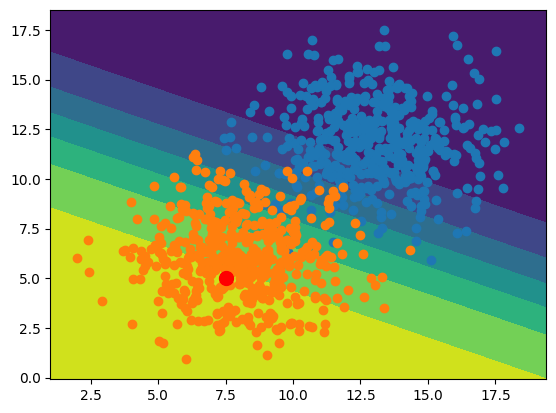

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="red")
print("Prediction is:", prediction)